In [ ]:
# # Optionally if using AMD/Intel GPU with PlaidML
# import os
# os.environ['KERAS_BACKEND']='plaidml.keras.backend'

In [1]:
from keras.models import load_model
import numpy as np
import cv2
from matplotlib import pyplot as plt
import urllib.request
import time
# %matplotlib inline
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = load_model('../CNNPredictions/CNN-final-model-v3.h5')

Using TensorFlow backend.


#### Working with an image

In [2]:
def showImg(img):
    plt.imshow(img)
#     plt.show()    # display imageinline
    cv2.imwrite( "output.jpg", img )
    ! open output.jpg

In [3]:
def processImage(img):
    font = cv2.FONT_HERSHEY_COMPLEX
    crop_margin = 0.2

    height, width, _ = img.shape
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)
    person_num = 0
    for (x,y,w,h) in faces:
        person_num += 1

        x1 = int(x - crop_margin * w)
        y1 = int(y - crop_margin * h)
        x2 = int(x + (1 + crop_margin) * w)
        y2 = int(y + (1 + crop_margin) * h)

        if x1 < 0:
            x1 = 0
        if y1 < 0:
            y1 = 0
        if x2 > width:
            x2 = width
        if y2 > height:
            y2 = height


        crop_img = gray_img[y1:y2, x1:x2]
        try: 
    #         print(f'Processing face #{person_num}: ({x1},{y1}),({x2},{y2})')
            resized_normalized = cv2.resize(crop_img, (100, 100))/255
            cv2.rectangle(img, (x1,y1), (x2, y2), (255,255,0), 2)
            for_predict = resized_normalized.reshape(-1,100,100,1)
            start = time.time()
            prediction = model.predict(for_predict)[0][0]
            end = time.time()
            print(f"Inference: {end-start} seconds")

            if (prediction >= 0.5):
                text = f'M({prediction:.2f})'
                cv2.putText(img, text, (x,y), font, w/140, (255,200,0), 2, cv2.LINE_AA)
            else:
                text = f'F({prediction:.2f})'
                cv2.putText(img, text, (x,y), font, w/140, (150,150,255), 2, cv2.LINE_AA)

            
        except:
    #         print(f'Image({width},{height}) failed to crop face #{person_num}: ({x1},{y1}),({x2},{y2})')
            pass
    showImg(img)

Inference: 0.030287981033325195 seconds
Inference: 0.014937162399291992 seconds
Inference: 0.013913154602050781 seconds
Inference: 0.014430999755859375 seconds
Inference: 0.013632774353027344 seconds
Inference: 0.0135498046875 seconds
Inference: 0.013375997543334961 seconds
Inference: 0.013443946838378906 seconds


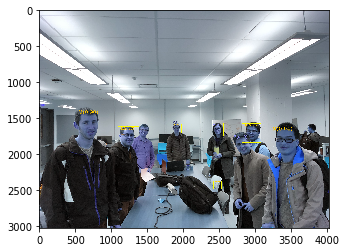

In [5]:
# Reading from file 
img = cv2.imread('group2.jpg')
processImage(img)
showImg(img)

#### Guess the gender

In [ ]:
# Reading from url 
resp = urllib.request.urlopen('https://preview.redd.it/6wxvhszskbn21.jpg?width=640&crop=smart&auto=webp&s=0b6830f71ff094fd70616b64165b7c788f386764')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
showImg(img)
input()
processImage(img)

In [ ]:
# Read from url
resp = urllib.request.urlopen('https://i.redd.it/wn3w5zlkf1e21.jpg')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
showImg(img)
input()
processImage(img)

In [ ]:
# Reading from url
resp = urllib.request.urlopen('https://i.redd.it/w8cto4248ta21.png')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
showImg(img)
input()
processImage(img)

In [ ]:
# Reading from url
resp = urllib.request.urlopen('https://preview.redd.it/lgs5bt0ylaa21.jpg?width=640&crop=smart&auto=webp&s=bbd54f6ae61a76a270db0500568038973ee6dabc')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
showImg(img)
input()
processImage(img)

In [ ]:
# Reading from url
resp = urllib.request.urlopen('https://preview.redd.it/d6e2j5vgs1j21.jpg?width=960&crop=smart&auto=webp&s=bb4164e96f6436be2d29ce38099c5f7a0cd1ddeb')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
showImg(img)
input()
processImage(img)

#### Working with video feed

In [2]:
cap = cv2.VideoCapture(0)  # Camera device

In [3]:
font = cv2.FONT_HERSHEY_COMPLEX
img = cv2.imread('group.jpg')
crop_margin = 0.2

while True:
    ret, img = cap.read()
    
    height, width, _ = img.shape
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)
    person_num = 0
    for (x,y,w,h) in faces:
        person_num += 1

        x1 = int(x - crop_margin * w)
        y1 = int(y - crop_margin * h)
        x2 = int(x + (1 + crop_margin) * w)
        y2 = int(y + (1 + crop_margin) * h)

        if x1 < 0:
            x1 = 0
        if y1 < 0:
            y1 = 0
        if x2 > width:
            x2 = width
        if y2 > height:
            y2 = height


        crop_img = gray_img[y1:y2, x1:x2]
        try: 
    #         print(f'Processing face #{person_num}: ({x1},{y1}),({x2},{y2})')
            resized_normalized = cv2.resize(crop_img, (100, 100))/255
            cv2.rectangle(img, (x1,y1), (x2, y2), (255,255,0), 2)
            prediction = model.predict(resized_normalized.reshape(-1,100,100,1))[0][0]

            if (prediction >= 0.5):
                text = f'M({prediction:.2f})'
                cv2.putText(img, text, (x,y), font, w/140, (255,200,0), 2, cv2.LINE_AA)
            else:
                text = f'F({prediction:.2f})'
                cv2.putText(img, text, (x,y), font, w/140, (150,150,255), 2, cv2.LINE_AA)

        except:
    #         print(f'Image({width},{height}) failed to crop face #{person_num}: ({x1},{y1}),({x2},{y2})')
            pass
    
    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

AttributeError: 'NoneType' object has no attribute 'shape'

Notes: There seems to be a bug with OpenCV running in Jupyter Notebook, cv2.imshow() causes the program to hang. The last line 'cv2.waitKey(1)' somehow bypasses it and allows the cv2.imshow() to work. Even so, you still need to restart the kernel after stopping the run.

In [4]:
# reboot kernel
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}